   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


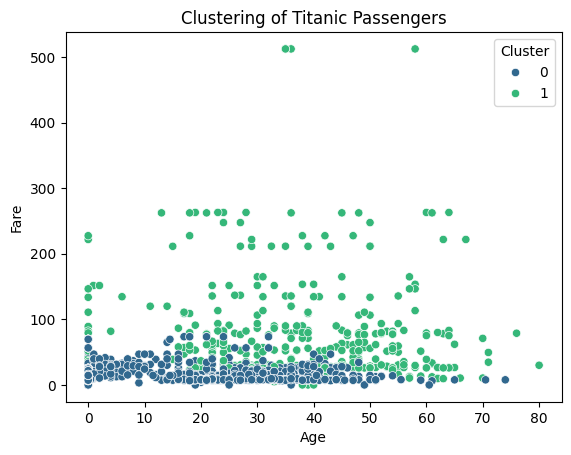

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Titanic dataset from Excel file
titanic_data = pd.read_excel("titanic.xls")

# Preview the dataset
print(titanic_data.head())

# Handle non-numeric columns
non_numeric_columns = titanic_data.select_dtypes(exclude=[np.number]).columns
titanic_data = titanic_data.drop(non_numeric_columns, axis=1).fillna(0)

# Standardize the data
scaler = StandardScaler()
titanic_data_scaled = scaler.fit_transform(titanic_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(titanic_data_scaled)
titanic_data['Cluster'] = kmeans.labels_

# Visualize clusters
sns.scatterplot(data=titanic_data, x='age', y='fare', hue='Cluster', palette='viridis')
plt.title('Clustering of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()



In [5]:
# For supervised learning, we'll predict survival
X = titanic_data.drop(['survived', 'Cluster'], axis=1)
y = titanic_data['survived']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.6984732824427481
Confusion Matrix:
[[120  24]
 [ 55  63]]
